In [1]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

# Part 1 Data preparation and preprocessing

### Load the seek job market dataset

In [2]:
df = pd.read_csv("data.csv")
# Ignore warning

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN


### Initial Dataset Description

Prior to any data preprocessing to get a better description of the data, I will describe the dataset at face value. There are 13 attributes. They are as follows:


<table style="width:70%">
  <tr>
    <th style="width:13%; text-align: center" >Attribute</th>
    <th style="text-align: left">Description</th>

  </tr>
  <tr>
    <td style="text-align: center">ID</td>
    <td style="text-align: left">This seems to the the unique ID that Seek attributes to each job listing. This attribute helps seek with organising their listing in the backend, but in our case, we are looking to analyse all the job listings as a whole, therefore I will be removing this attribute.</td>
  </tr>
  <tr>
    <td style="text-align: center">Title</td>
    <td style="text-align: left">This is the job title. The issue with these is that job titles could mean different levels in different companies, but we may be able to extract information if the title includes "junior" or "senior" to help segment this data.</td>
  </tr>
  <tr>
    <td style="text-align: center">Company</td>
    <td style="text-align: left">This refers to the company hiring. It is categorical data.</td>
  </tr>
  <tr>
    <td style="text-align: center">Date</td>
    <td style="text-align: left">This is the date in which the jobposting was made. It has a time stamp in the number which could be used for further analysis, but for simplicity, I will be removing the time. This is continuous data.</td>
  </tr>
  <tr>
    <td style="text-align: center">Location</td>
    <td style="text-align: left">This categorical data shows the broad location where the job is.</td>
  </tr>
  <tr>
    <td style="text-align: center">Area</td>
    <td style="text-align: left">The area is a more indepth area within a location.</td>
  </tr>
  <tr>
    <td style="text-align: center">Classification</td>
    <td style="text-align: left">This refers to the industry sector of the job. This is standardised categorical data</td>
  </tr>
      <tr>
    <td style="text-align: center">Sub-Classification</td>
    <td style="text-align: left">This refers to the type of job within the industry sector. This is standardised categorical data too</td>
  </tr>
  <tr>
    <td style="text-align: center">Requirements</td>
    <td style="text-align: left">Text data that provides a short list of requiremnts for the job</td>
  </tr>
  <tr>
    <td style="text-align: center">Full Description</td>
    <td style="text-align: left">A long description of what the job entails.</td>
  </tr>
  <tr>
    <td style="text-align: center">Highest Salary</td>
    <td style="text-align: left">The highest salary offered by the comapny for the job.</td>
  </tr>
  <tr>
    <td style="text-align: center">Lowest Salary</td>
    <td style="text-align: left">The lowest salary offered by the company for the job </td>
  </tr>
  <tr>
    <td style="text-align: center">Job Type</td>
    <td style="text-align: left">This different types of employment one can have. They are full time, part time, contract/temp, casual/vacation</td>
  </tr>
</table>


In [4]:
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

### Data Preparation and preprocessing

#### Calculate the average salary
Salary ranges can be used to compare different jobs, but one has to compare ranges which can be confusing - comparing the average salary of jobs makes it easier to compare salaries.

In [5]:
#Your code here
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary) / 2)

#### Remove ID
As mentioned above, we are looking to anaylse the job market as a whole, making the seek unique ID for jobs not necessary

In [6]:
print("\nRemoval of Id column reduces attributes in dataset from ", df.shape[1], end="")
df.drop('Id', axis=1, inplace=True)
print(" to ", df.shape[1])


Removal of Id column reduces attributes in dataset from  14 to  13


#### Clean Date
In the date value, there is a time component to the date - for simplicity of analysis, I will be removing the time componenet and focus on the date itself

In [7]:
#Your code to clean date
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.dtypes

Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

#### Check for duplicates

In [10]:
duplicate_count = df[df.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)
no_dates = df.drop('Date', axis=1)
duplicate_count_no_dates = no_dates[no_dates.duplicated()].shape[0]
difference = duplicate_count_no_dates - duplicate_count
print('Additional duplicates found without regard to timestamp: ', difference)
df.drop_duplicates(keep="last")

Duplicates found:  8607
Additional duplicates found without regard to timestamp:  6724


,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318472,Program Manager - Trade Reporting,Talenza,2019-03-13,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,200,999,NaN,599.5
318473,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,200,999,NaN,599.5
318474,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,200,999,NaN,599.5
318475,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,200,999,NaN,599.5


In [11]:
nulls = df.isnull().sum()
total_values = df.shape[0]
print("Attributes and their percentage of missing data:")
for i in range(len(nulls)):
    print("{:>18}:".format(df.columns.values[i]), end=" ")
    print("{:.2f}%".format((nulls[i] / total_values) * 100))

Attributes and their percentage of missing data:
             Title: 0.00%
           Company: 3.77%
              Date: 0.00%
          Location: 38.07%
              Area: 61.49%
    Classification: 38.07%
 SubClassification: 38.07%
       Requirement: 0.00%
   FullDescription: 5.08%
      LowestSalary: 0.00%
     HighestSalary: 0.00%
           JobType: 5.05%
     AverageSalary: 0.00%


Area is the attribute with the most missing data. It is suspected that only large cities contain a value for area. This will be investigates further.
The percentege of missing data for location classification and subclassification seems to be the same. This needs to be investigated further too.
Company, full description and job type seems to have to have some missing data, but for the most part this a small number, so it will not be investigated futher

#### Check for area missing data

In [12]:
df_area = df[(df['Area'].isna()==False) & (df['Location'].isna()==False)]
print(df_area['Location'].unique())

['Sydney' 'Brisbane' 'Melbourne' 'Perth']


Syndey, Brisbane, Melbourne and Perth are the only places where location and area is present

#### Check the missing location classification and subclassification

In [13]:
df_missing_data = df[(df['Classification'].isna()==True)&(df['SubClassification'].isna()==True)&(df['Location'].isna()==True)]
missing_data_dates = df_missing_data.sort_values('Date')['Date'].dropna().unique()
missing_data_start = missing_data_dates[0]
print(missing_data_start)
missing_data_end = missing_data_dates[len(missing_data_dates)-1]
print(missing_data_end)

2018-12-16T00:00:00.000000000
2019-03-13T00:00:00.000000000


Date range where data is missing

In [14]:
df_reduced = df[df['Date'] < missing_data_start]
print(df_reduced[['Location', 'Classification', 'SubClassification']].isnull().sum())

Location             0
Classification       0
SubClassification    0
dtype: int64


In [15]:
df_reduced = df[df['Date'] > missing_data_end]
print(df_reduced[['Location', 'Classification', 'SubClassification']].isnull().sum())

Location             0.0
Classification       0.0
SubClassification    0.0
dtype: float64


Double checking before and after that the dates if the data is missing. It is not

In [16]:
#Save the cleaned and preprocessed dataset - this was taken from the tutorial but it missed out removing the index, so I have done that.
df.to_csv("preprocessed_data.csv", index=False)

With the completion of data preprocessing, I saved the processed data so it would not have to be done again.

# Data Preparation and preprocessing summary

## Data first impressions
The data was loaded in using the read_csv() funciton from Pandas. Upon initial inspection of the data, all the attributes had the data type object expect for LowestSalary and HighestSalary - the date attribute needed to be converted to an appropriate data type. The attribute ID needed to be removed as it's purpose is to help Seek with their organisation of data, but for the purposes of this analysis, this data is irrelevant to contributing to the analysis of job market data, hence it was removed.

## Data types 
<ul>
    <li>The date column was converted to datetime data type, making it easier for data manipulation. The time component was also removed, as I will focus only on date ranges.</li>
    <li>The ID column was removed</li>
</ul>

## Duplicate data
<ul>
    <li>Identical duplicates were deleted</li>
    <li> There are duplicates that were posted at different dates. While it's easier to delete these values, it may be a mistake to do so, as the same listing could be creating twice and different time frames due to an inability to fill a position. As such, these duplicates were not deleted.</li>
</ul>

## Missing data
<ul>
    <li>Area has the most missing attributes at 61.49%. Upon further invesitgation, this was due to the area attribute only being filled in for major cities, those being Sydney, Brisbane, Melbourne, and Perth. This also indicates that 100-61.49 = 38.51% of jobs are not within the large cities.</li>
    <li>Classification, SubClassification and Location had the same amount of missing values, and upon futher investigation this was only for the date ranges of 16 December 2018 to 13 March 2019. Classification, SubClassification and Location can only be found from 1 October 2018 to 16 December 2018</li>
    <li>Company, Jobtype and Full description have a small amount of missing values. This is noted so that there is precaution when taking conclusions from those specific attributes.</li>
</ul>

## Hypothesis
<ul>
    <li>With Canberra being the seat of the australian government, I expect that Canberra has the highest proportion of government jobs</li>
    <li>The larger the city, the more competitive the salaries will be for every sector</li>
    <li>Offering for part time jobs will mostly be for retail/consumer jobs and hospitality/tourism jobs.</li>
    <li>With this dataset being pre-covid, I expect that the most popular classifications of jobs will be IT jobs, hospitality and tourism.</li>
</ul>

# Part 2: Data Analysis and Interpretation

## Job Meta Data

In this section, I analyse the job metadata, looking at the attributes without going into too much detail. More in depth analysis will come later in the document

In [17]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


### Average salary

In [18]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [24]:
#Group by average salary and count the numbers
average_salary_df = df.groupby('AverageSalary').count()
average_salary_df['AverageSalary'] = (average_salary_df.index*1000).astype(float).map('{:,.0f}'.format)
average_salary_df['Count'] = average_salary_df["Title"]

In [25]:
#Analysing salary ranges
low = df['LowestSalary'].dropna().unique()
high = df['HighestSalary'].dropna().unique()
assert(len(low)==len(high))

df_salary_ranges = pd.DataFrame({"Low": low, "High":high})
df_salary_ranges['Count'] = df_salary_ranges['Low'].apply(lambda x: len(df[df['LowestSalary']==x]))
df_salary_ranges['Label'] = pd.Series(['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', '120-150', '150-200', '200-999'])

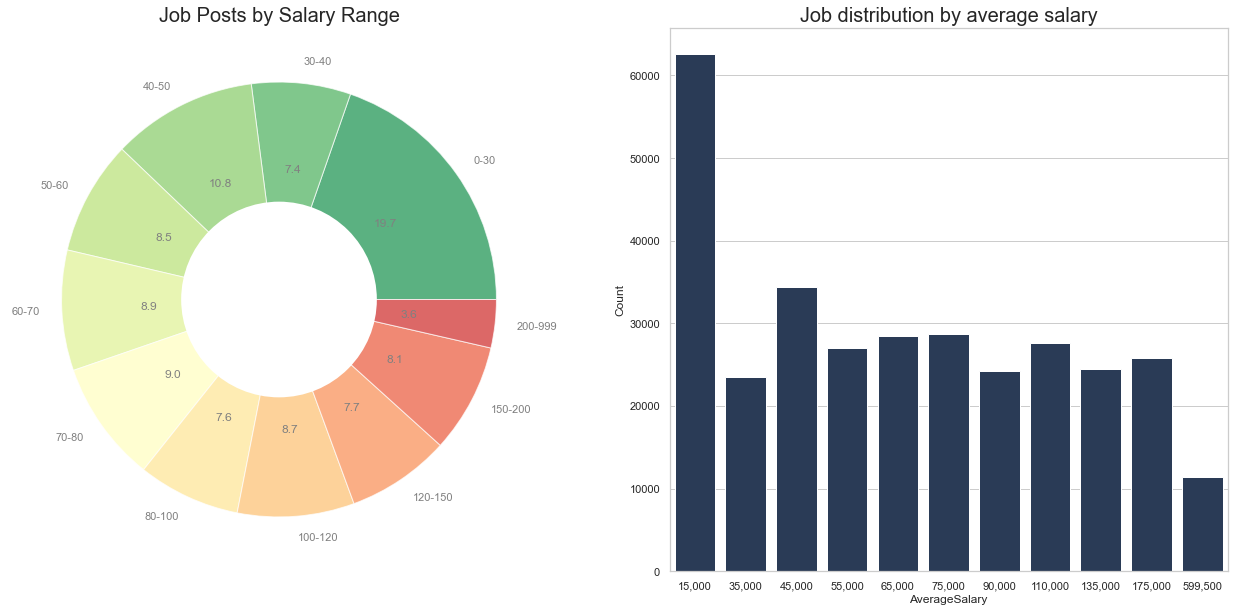

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

#create layout
fig, axes = plt.subplots(1, 2, figsize=(22,10))

#salary ranges plot
p, texts, autotexts = axes[0].pie(df_salary_ranges['Count'], colors=sns.color_palette("RdYlGn_r", len(df_salary_ranges)),labels=df_salary_ranges['Label'],wedgeprops={'alpha':0.7},autopct='%1.1f')
axes[0].title.set_text('Job Posts by Salary Range')
axes[0].title.set_size(20)

# add centre circle to make it a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
axes[0].add_patch(centre_circle)

for t in texts:
    t.set_color('gray')
for t in autotexts:
    t.set_color('gray')
    t.set_size(12)
    
#jobtype plot    
sns.barplot(ax=axes[1], data=average_salary_df, x="AverageSalary", y="Count", color="#23395d")
axes[1].title.set_text('Job distribution by average salary')
axes[1].title.set_size(20)
    
plt.show()

### Assumptions
The assumption that salary is the average salary x 1000 is taken from the assignment help video.

### Observations
<ul>
    <li>There are 11 salary ranges, an the largest salary range is 0-30, encompassing 19.7%, amounting to ~60,000 listing.</li>
    <li>The smallest salary range is the highest range of 200-999, and it only encompasses 3.6%, amounting to ~10,000 listings.</li>
    <li>The salary ranges in between roughly have 8% share each, roughly 27,500 listings per salay range and average salary.</li>
</ul>
    

### Job Type

In [77]:
#Group by jobtype
job_type_df = df.groupby('JobType').count()
job_type_df['Count'] = job_type_df["Title"]
job_type_df['JobType'] = job_type_df.index
job_type_df

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,AverageSalary,Count,JobType
JobType,,,,,,,,,,,,,,
Casual/Vacation,25355,23872,25355,16285,8751,16285,16285,25353,25342,25355,25355,25355,25355,Casual/Vacation
Contract/Temp,53906,53085,53906,33962,20878,33962,33962,53906,53901,53906,53906,53906,53906,Contract/Temp
Full Time,201225,192847,201225,122142,77946,122142,122142,201224,201169,201225,201225,201225,201225,Full Time
Part Time,21893,20906,21893,13347,7862,13347,13347,21889,21890,21893,21893,21893,21893,Part Time


In [78]:
start = 0
full_time = job_type_df["Count"]["Full Time"]
contract_temp = job_type_df["Count"]["Contract/Temp"]
casual_vacation = job_type_df["Count"]["Casual/Vacation"]
part_time = job_type_df["Count"]["Part Time"]

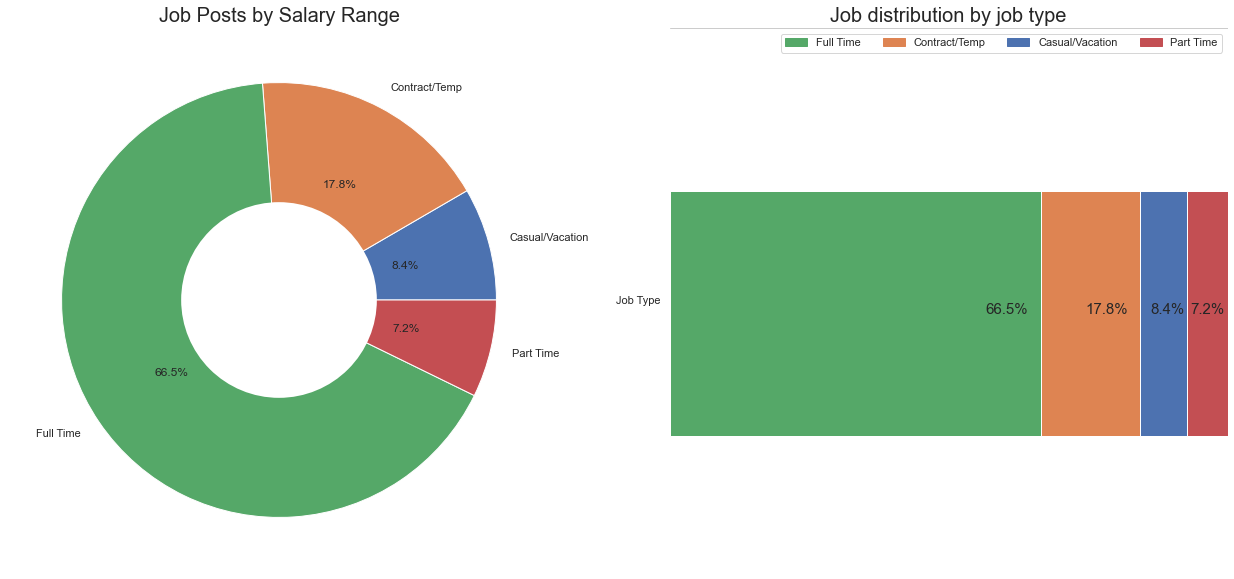

In [79]:
import matplotlib.patches as mpatches

#create layout
fig, axes = plt.subplots(1, 2, figsize=(22,10))

#salary ranges plot
axes[0].pie(
    job_type_df['Count'],
    labels=job_type_df['JobType'],
    autopct="%.1f%%"
)
axes[0].title.set_text('Job Posts by Salary Range')
axes[0].title.set_size(20)

# add centre circle to make it a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
axes[0].add_patch(centre_circle)

for t in texts:
    t.set_color('gray')
for t in autotexts:
    t.set_color('gray')
    t.set_size(12)

axes[1].broken_barh([(start, full_time),
                (full_time, full_time + contract_temp),
                (full_time + contract_temp, full_time + contract_temp + casual_vacation),
                (full_time + contract_temp + casual_vacation, full_time + contract_temp + casual_vacation + part_time)],
               [10, 9], facecolors=('#55A868', '#DE8452', '#4D72B0', "#C34F53"))
axes[1].set_ylim(5, 15)
axes[1].set_xlim(0, job_type_df["Count"].sum()) # that is the sum of counts of all jobs
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_yticks([15, 25])
axes[1].set_xticks([])

axes[1].set_axisbelow(True) 

axes[1].set_yticklabels(['Job Type', ' '])
axes[1].title.set_size(20)

axes[1].grid(axis='x')
axes[1].text(full_time-30000, 14.5, "66.5%", fontsize=15)
axes[1].text((full_time + contract_temp)-30000, 14.5, "17.8%", fontsize=15)
axes[1].text((full_time + contract_temp + casual_vacation)-20000, 14.5, "8.4%", fontsize=15)
axes[1].text((full_time + contract_temp + casual_vacation + part_time)-20000, 14.5, "7.2%", fontsize=15)

axes[1].title.set_text('Job distribution by job type')

leg1 = mpatches.Patch(color='#55A868', label='Full Time')
leg2 = mpatches.Patch(color='#DE8452', label='Contract/Temp')
leg3 = mpatches.Patch(color='#4D72B0', label='Casual/Vacation')
leg4 = mpatches.Patch(color='#C34F53', label='Part Time')
axes[1].legend(handles=[leg1, leg2, leg3, leg4], ncol=4)
    
plt.show()

### Observation
<ul>
    <li>There are four different job types. They are: Full Time, Contract/Temp, Casual/Vacation, Part Time</li>
    <li>Full time is the most offered job type at 66.5% followed by Contract/Temp at 17.8%, with Casual/Vaction and Part time roughly similar at ~8%</li>
    <li>In my hypothesis I mention the distribution of sectors within job types, an that will be looked at later</li>
    <li>Unrelated to analysis, I find that the stacked bar chart is much easier to compare ratios than the donut chart, however the donut chart is easier to code and reproduce.</li>
</ul>

# Study market by locations

In [100]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
ACT,6250,6250,6150,6250,0,6250,6250,6250,5805,6250,6250,5807,6250,ACT,6250
Adelaide,6653,6653,6303,6653,0,6653,6653,6653,6312,6653,6653,6313,6653,Adelaide,6653
Adelaide Hills & Barossa,193,193,186,193,0,193,193,193,182,193,193,182,193,Adelaide Hills & Barossa,193
Albany & Great Southern,150,150,149,150,0,150,150,150,134,150,150,134,150,Albany & Great Southern,150
Albury Area,416,416,404,416,0,416,416,416,407,416,416,407,416,Albury Area,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western QLD,514,514,494,514,0,514,514,514,485,514,514,485,514,Western QLD,514
Whyalla & Eyre Peninsula,201,201,191,201,0,201,201,201,198,201,201,198,201,Whyalla & Eyre Peninsula,201
"Wollongong, Illawarra & South Coast",1657,1657,1617,1657,0,1657,1657,1657,1583,1657,1657,1583,1657,"Wollongong, Illawarra & South Coast",1657


In [103]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.sort_values("Count", ascending=False, inplace=True)
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60765,60765,58919,60765,53778,60765,60765,60765,57456,60765,60765,57470,60765,Sydney,60765
Melbourne,46690,46690,44941,46690,41297,46690,46690,46686,43821,46690,46690,43827,46690,Melbourne,46690
Brisbane,21466,21466,20612,21466,17412,21466,21466,21466,20214,21466,21466,20221,21466,Brisbane,21466
Perth,13198,13198,12766,13198,10171,13198,13198,13198,12287,13198,13198,12298,13198,Perth,13198
Adelaide,6653,6653,6303,6653,0,6653,6653,6653,6312,6653,6653,6313,6653,Adelaide,6653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yorke Peninsula & Clare Valley,96,96,94,96,0,96,96,96,90,96,96,90,96,Yorke Peninsula & Clare Valley,96
"Tumut, Snowy & Monaro",86,86,85,86,0,86,86,86,83,86,86,83,86,"Tumut, Snowy & Monaro",86
Somerset & Lockyer,65,65,63,65,0,65,65,65,64,65,65,64,65,Somerset & Lockyer,65


### Get top 20 big cities and use bar chart to display market size in each city (2 marks).

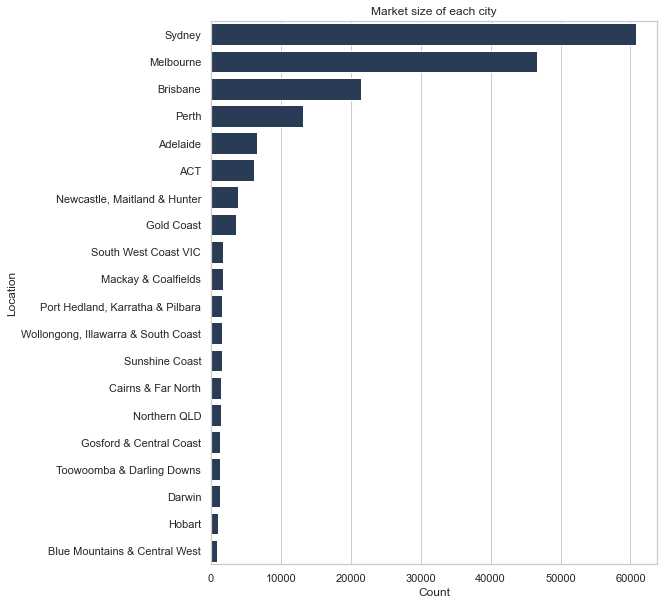

In [106]:
plt.figure(figsize=(8,10))
sns.barplot(
    data=locationDf,
    x="Count",
    y="Location",
    color="#23395d",
    order=locationDf["Location"][:20]
)

plt.title("Market size of each city")
plt.show()

### Visualize the market share between the cities (2 marks)

In [108]:
#Get top 10 big cities
locationDf = locationDf.sort_values(by=["Count"], ascending =False)
locationTop10Df = locationDf[:10].copy()
#others
new_row = pd.DataFrame(data = {
    'Location' : ['Others'],
    'Count' : [locationDf["Count"][10:].sum()]
})
locationTop10Df = pd.concat([locationTop10Df, new_row],sort=False)
locationTop10Df.index = locationTop10Df['Location']
locationTop10Df

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60765.0,60765.0,58919.0,60765.0,53778.0,60765.0,60765.0,60765.0,57456.0,60765.0,60765.0,57470.0,60765.0,Sydney,60765
Melbourne,46690.0,46690.0,44941.0,46690.0,41297.0,46690.0,46690.0,46686.0,43821.0,46690.0,46690.0,43827.0,46690.0,Melbourne,46690
Brisbane,21466.0,21466.0,20612.0,21466.0,17412.0,21466.0,21466.0,21466.0,20214.0,21466.0,21466.0,20221.0,21466.0,Brisbane,21466
Perth,13198.0,13198.0,12766.0,13198.0,10171.0,13198.0,13198.0,13198.0,12287.0,13198.0,13198.0,12298.0,13198.0,Perth,13198
Adelaide,6653.0,6653.0,6303.0,6653.0,0.0,6653.0,6653.0,6653.0,6312.0,6653.0,6653.0,6313.0,6653.0,Adelaide,6653
ACT,6250.0,6250.0,6150.0,6250.0,0.0,6250.0,6250.0,6250.0,5805.0,6250.0,6250.0,5807.0,6250.0,ACT,6250
"Newcastle, Maitland & Hunter",3958.0,3958.0,3824.0,3958.0,0.0,3958.0,3958.0,3958.0,3721.0,3958.0,3958.0,3722.0,3958.0,"Newcastle, Maitland & Hunter",3958
Gold Coast,3588.0,3588.0,3347.0,3588.0,0.0,3588.0,3588.0,3588.0,3386.0,3588.0,3588.0,3386.0,3588.0,Gold Coast,3588
South West Coast VIC,1790.0,1790.0,1619.0,1790.0,0.0,1790.0,1790.0,1790.0,1673.0,1790.0,1790.0,1681.0,1790.0,South West Coast VIC,1790


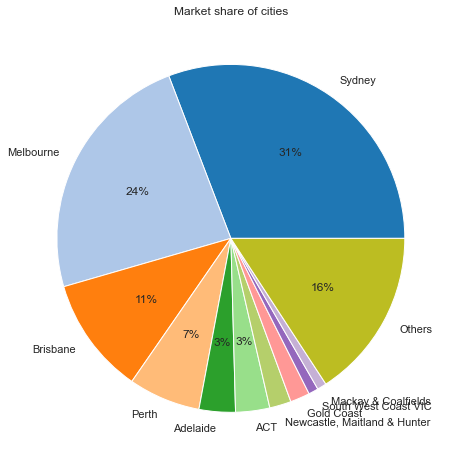

In [118]:

def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 3 else ''

plt.figure(figsize=(8,8))
plt.title("Market share of cities")
plt.pie(
    locationTop10Df['Count'],
    labels=locationTop10Df['Location'],
    colors=colors,
    autopct=my_autopct
)
plt.show()

### Visualize the salary distribution in top biggest cities (2 marks)

In [ ]:
#Your code here

# 1.5 Study by sectors

### The number of postings for each sector. (2 marks)

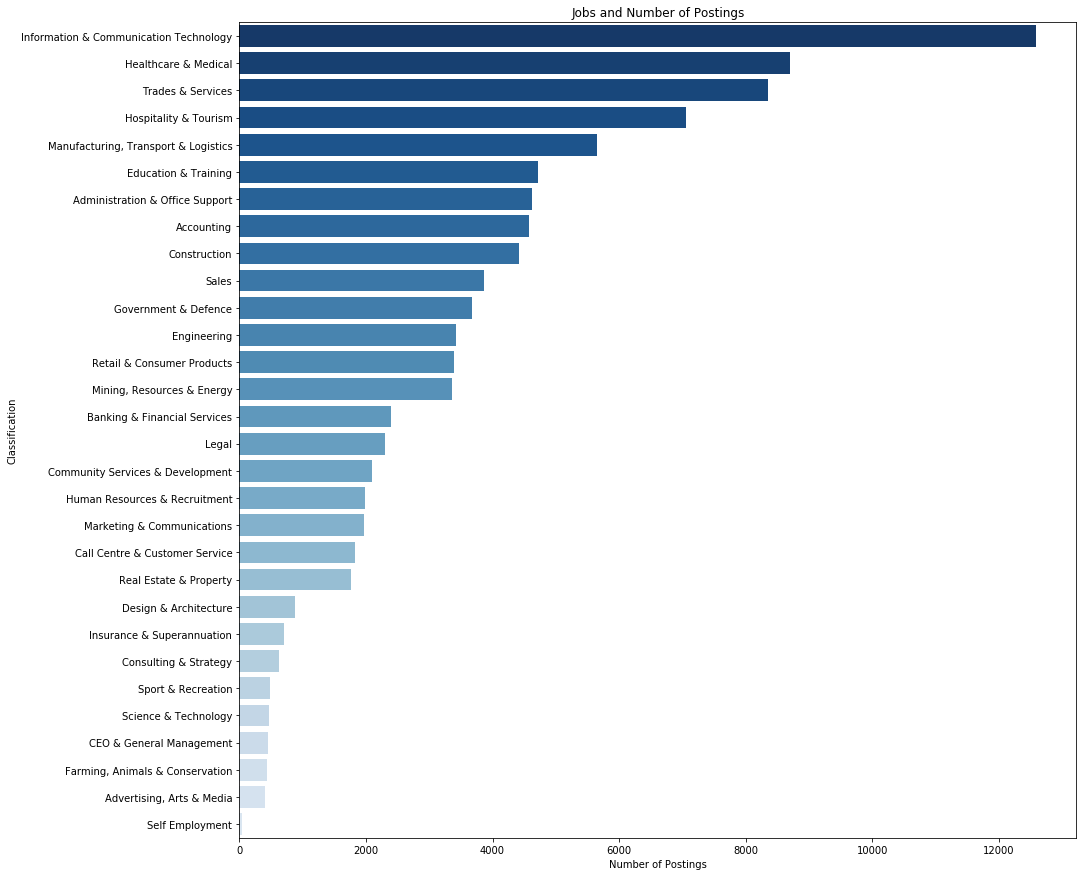

In [16]:
#Your code here

### Find the main spotlight sub-sectors in each sector (1 mark)

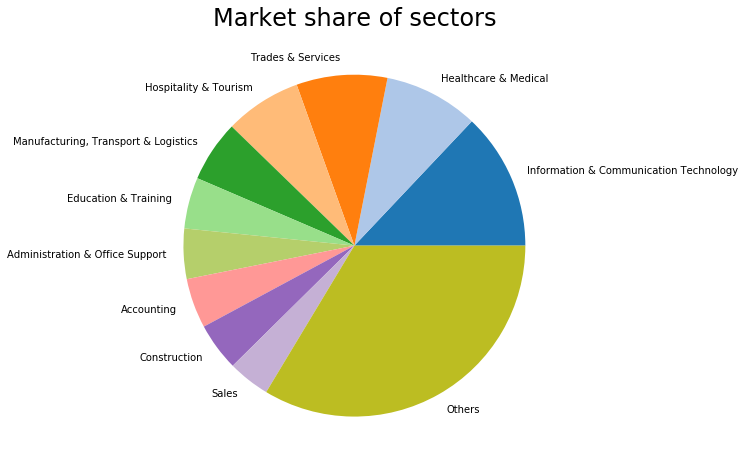

In [26]:
# Pie char for job market share of classifications
from matplotlib import cm

df_pie = df_classification['Classification'].groupby(df_classification['Classification'])

df_pie = df_pie.count().sort_values(ascending=False).to_frame()
df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index
df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']


#your code here

### Visualize the salary range in the sectors/sub-sectors (1 mark)

In [ ]:
#your code here